In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0


### **데이터 가져오기**

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

68608000/68606236 [==============================] - 0s 0us/step


'/root/.keras/datasets/cats_and_dogs_filtered'

In [4]:
# 데이터의 경로설정
train_dir = os.path.join(PATH, 'train')
print(train_dir)
validation_dir = os.path.join(PATH, 'validation')

/root/.keras/datasets/cats_and_dogs_filtered/train


In [0]:
# 각 경로에서 CAT, DOG 분리되어 있음
train_cats_dir = os.path.join(train_dir, 'cats') # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory with our validation dog pictures

In [6]:
# 해당 경로별 이미지 데이터의 갯수
num_cats_tr = len(os.listdir(train_cats_dir))   # os.listdir : 해당 경로 안의 모든 파일/디렉터리를 리스트로 보여줌
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

print('이미지 갯수 (학습용) 개 : {}, 고양이 : {}'.format(num_dogs_tr, num_cats_tr))
print('이미지 갯수 (평가용) 개 : {}, 고양이 : {}'.format(num_dogs_val, num_cats_val))

이미지 갯수 (학습용) 개 : 1000, 고양이 : 1000
이미지 갯수 (평가용) 개 : 500, 고양이 : 500


In [13]:
#!ls -l /root/.keras/datasets/cats_and_dogs_filtered

total 12
drwxr-xr-x 4 root root 4096 Jun 11 03:34 train
drwxr-xr-x 4 root root 4096 Jun 11 03:34 validation
-rw-r--r-- 1 root root  140 Jun 11 03:34 vectorize.py


### **신경망 모델 만들기**

In [0]:
batch_size = 512    # 학습할 때 몇 장씩 학습할지?
epochs = 15         # 전체 데이터에 대해 몇 번할지?
IMG_HEIGHT = 150    # 데이터(이미지) 사이즈 통일
IMG_WIDTH = 150     # 데이터(이미지) 사이즈 통일

ImageDataGenerator

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,   # 이미지가 편중되어 있을 수 있으므로 임의로 섞음
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              # validation data는 평가용이므로 굳이 shuffle 하지 않아도 됨
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


모델 생성

In [0]:
model = Sequential([
  Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),   # 이미지가 r,g,b 3채널
  MaxPooling2D(),
  Conv2D(32,3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64,3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')   # 출력층(이진분류)
])

모델 설정
* 비용 함수
* 최적화 함수

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

모델의 형태 확인

In [19]:
model.summary()
# pooling 하면 사이즈가 반으로 줄어듦
# convolution 하면 줄어들지 않음

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

모델 학습

In [0]:
total_train = num_cats_tr + num_dogs_tr   # 실제 이미지 크기
total_val = num_cats_val + num_dogs_val

In [13]:
history = model.fit_generator(   # 데이터가 만들어둔 객체를 사용할 때 fit_generator를 씀
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
3/3 [==============================] - 7s 2s/step - loss: 1.5435 - accuracy: 0.5249 - val_loss: 1.3740 - val_accuracy: 0.5176
Epoch 2/15
3/3 [==============================] - 8s 3s/step - loss: 0.9794 - accuracy: 0.4698 - val_loss: 0.7682 - val_accuracy: 0.4883
Epoch 3/15
3/3 [==============================] - 8s 3s/step - loss: 0.7431 - accuracy: 0.5087 - val_loss: 0.7028 - val_accuracy: 0.5117
Epoch 4/15
3/3 [==============================] - 8s 3s/step - loss: 0.7045 - accuracy: 0.4926 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 8s 3s/step - loss: 0.6919 - accuracy: 0.5524 - val_loss: 0.6868 - val_accuracy: 0.4941
Epoch 6/15
3/3 [==============================] - 7s 2s/step - loss: 0.6826 - accuracy: 0.5155 - val_loss: 0.6790 - val_accuracy: 0.6016
Epoch 7/15
3/3 [==============================] - 7s 2s/step - loss: 0.6704 - accuracy: 0.6163 - val_l

결과 시각화

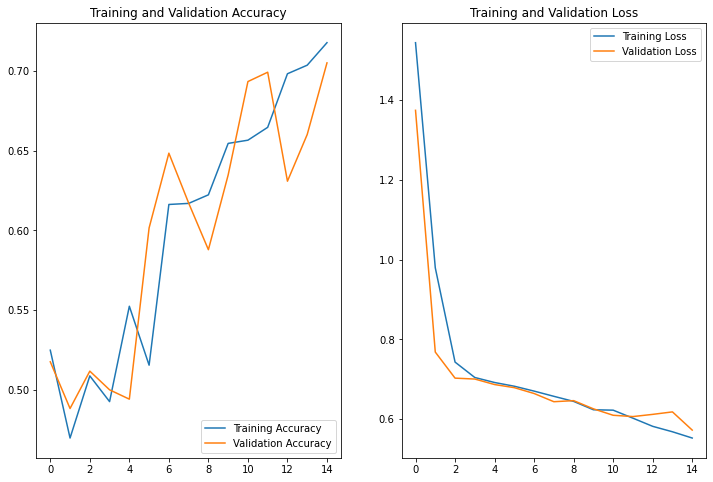

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()